In [1]:
import torchvision
import torch

model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(weight=torchvision.models.detection.FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT)

In [3]:
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400), torch.rand(3, 500, 400)]
predictions = model(x)
predictions

In [1]:
import cv2
import torchvision
import torch
import os
from xml.dom.minidom import parse
import xml.dom.minidom
import numpy
os.environ['KMP_DUPLICATE_LIB_OK']='True'

def iou(box1, box2):

    in_w = min(box1[2], box2[2]) - max(box1[0], box2[0])
    in_h = min(box1[3], box2[3]) - max(box1[1], box2[1])
    inter = 0 if in_h<0 or in_w<0 else in_h*in_w
    union = (box1[2] - box1[0]) * (box1[3] - box1[1]) + \
            (box2[2] - box2[0]) * (box2[3] - box2[1]) - inter
    iou = inter / union
    return iou

weights = torchvision.models.detection.FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(weights=weights)
model.eval()

extracted_features = []
extracted_colors = []
extracted_fnames = []
extracted_boxes = []
extracted_boxes_pd = []

fnames = os.listdir('./S2TLD/JPEGImages/')
for fname in fnames:

    # ground truth for this file
    box_list = []
    color_list = []
    color_fname = f'./S2TLD/Annotations/{fname[:-4]}.xml'
    DOM = parse(color_fname)
    objects = DOM.documentElement.getElementsByTagName('object')
    for object in objects:
        color = object.getElementsByTagName('name')[0].childNodes[0].data
        if 'red' == color:
            color = 0
        elif 'yellow' == color:
            color = 1
        elif 'green' == color:
            color = 2
        else:
            color = -1

        if color == -1:
            continue
        else:
            # a valid object
            color_list.append(color)
            xmin = int(object.getElementsByTagName('xmin')[0].childNodes[0].data)
            xmax = int(object.getElementsByTagName('xmax')[0].childNodes[0].data)
            ymin = int(object.getElementsByTagName('ymin')[0].childNodes[0].data)
            ymax = int(object.getElementsByTagName('ymax')[0].childNodes[0].data)
            box_list.append([xmin,ymin,xmax,ymax])

    if len(color_list) == 0:
        continue


    x = cv2.imread(f'./S2TLD/JPEGImages/{fname}')
    # cv2.imshow('1',x)
    # cv2.waitKey(20000)
    # cv2.destroyAllWindows()
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = torchvision.transforms.ToTensor()(x)

    detection = model([x])
    detection = detection[0]
    for idx in range(len(detection['labels'])):
        if detection['labels'][idx] == 10:
            
            # if it is close to our ground truth
            iou_list = [iou(box, detection['boxes'][idx].detach().numpy()) for box in box_list]
            max_iou_idx = numpy.argmax(iou_list)
            max_iou = iou_list[max_iou_idx]
            print(fname, max_iou, detection['boxes'][idx].detach().numpy(), box_list[max_iou_idx])
            if max_iou < 0.2:
                continue

            feature = detection['features'][idx]
            feature = feature.detach().cpu().numpy()
            
            extracted_features.append(feature)
            extracted_colors.append(color_list[max_iou_idx])
            extracted_boxes.append(box_list[max_iou_idx])
            extracted_boxes_pd.append(detection['boxes'][idx].detach().numpy())
            extracted_fnames.append(fname)
            print('recorded')

            

print(extracted_features)
print(extracted_colors)
    

2020-03-30 11_30_03.690871079.jpg 0.0 [756.9748  578.1989  767.25726 593.3737 ] [616, 477, 633, 521]
2020-03-30 11_30_04.156560834.jpg 0.3297703666971915 [609.25964 463.30765 634.2431  501.58157] [616, 477, 634, 523]
recorded
2020-03-30 11_30_04.156560834.jpg 0.0 [638.0768  467.92493 659.4437  501.37552] [616, 477, 634, 523]
2020-03-30 11_30_04.589430508.jpg 0.01080043531865554 [633.5228  477.51672 656.1433  516.3141 ] [615, 477, 634, 522]
2020-03-30 11_30_04.589430508.jpg 0.0692701190612849 [630.04175 467.84665 652.4135  504.36407] [615, 477, 634, 522]
2020-03-30 11_30_04.589430508.jpg 0.0 [637.9076  465.35486 661.6336  501.09537] [615, 477, 634, 522]
2020-03-30 11_30_04.589430508.jpg 0.0 [715.65173 523.8288  726.434   544.843  ] [615, 477, 634, 522]
2020-03-30 11_30_04.589430508.jpg 0.0 [636.63525 493.71667 658.8629  529.71075] [615, 477, 634, 522]
2020-03-30 11_30_04.589430508.jpg 0.0 [728.5446  528.483   740.37384 550.6062 ] [615, 477, 634, 522]
2020-03-30 11_30_04.803536736.jpg 0.

In [93]:
import cv2
import torchvision
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

weights = torchvision.models.detection.FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(weights=weights)
model.eval()


x = cv2.imread('./S2TLD/JPEGImages/2020-03-30 11_31_56.127042115.jpg')
# cv2.imshow('1',x)
# cv2.waitKey(20000)
# cv2.destroyAllWindows()
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
x = torchvision.transforms.ToTensor()(x)

detections = model([x])
        
    

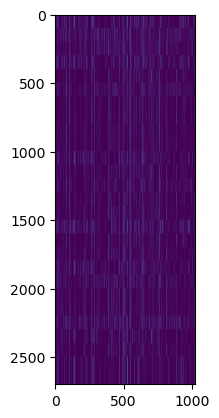

In [16]:
from matplotlib import pyplot as plt
import numpy
a = detections[0]['features'].detach().numpy()
a = a/a.max()
a = a[:,None,:]
a = numpy.repeat(a,100,axis=1)
a = a.reshape(-1, 1024)
plt.imshow(a)

In [78]:
print(len(extracted_features), len(extracted_colors))
print(extracted_features)

1159 1159
[array([0.       , 0.       , 0.       , ..., 0.7895058, 0.       ,
       0.       ], dtype=float32), array([0.       , 0.       , 0.       , ..., 1.1919458, 0.       ,
       0.       ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.      , 0.      , 0.      , ..., 0.571759, 0.      , 0.      ],
      dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.20301282, 0.        ,
       0.        ], dtype=float32), array([0.1759642, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32), arr

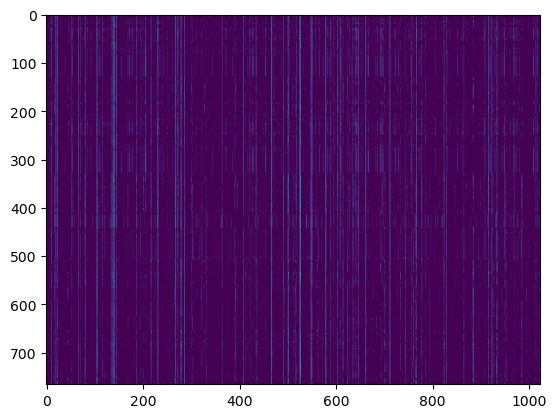

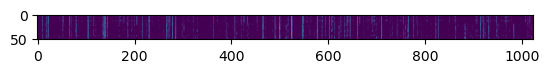

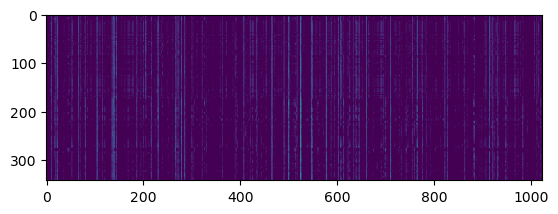

In [79]:
from matplotlib import pyplot as plt
import numpy
x,y = numpy.array(extracted_features), numpy.array(extracted_colors)
x = x/x.max()
x_0 = x[y == 0, :]
x_1 = x[y == 1, :]
x_2 = x[y == 2, :]


plt.imshow(x_0)
plt.show()
plt.imshow(x_1)
plt.show()
plt.imshow(x_2)
plt.show()

0.9285714285714286
0.8225152129817445
0.7868490732568403
[0 0 0 0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 2 2 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0]
[0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0]
0.9285714285714286


c:\Users\yizhuoc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


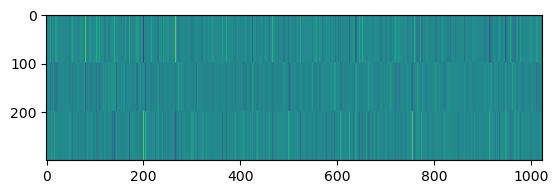

In [31]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
import pickle
from matplotlib import pyplot as plt

iou_list = numpy.array([iou(extracted_boxes_pd[idx], extracted_boxes[idx]) for idx in range(len(extracted_colors))])


x,y = numpy.array(extracted_features), numpy.array(extracted_colors)
idx = iou_list>0.6
x,y=x[idx],y[idx]

n_s = len(y)
n_t_s = int(n_s * 0.7)
clf = LogisticRegression(random_state=1,class_weight=None).fit(x[:n_t_s],y[:n_t_s])
print(clf.score(x[n_t_s:],y[n_t_s:]))
pred = clf.predict(x[n_t_s:])
print(sm.cohen_kappa_score(y[n_t_s:],pred))
print(sm.f1_score(y[n_t_s:],pred,average='macro'))
print(pred)
print(y[n_t_s:])

a = clf.coef_
a = numpy.repeat(a,100,axis=0)
a = a.reshape(-1, 1024)
plt.imshow(a)

with open('clf.pkl','wb') as f:
    pickle.dump(clf, f)
with open('x.pkl','wb') as f:
    pickle.dump(x, f)
with open('y.pkl','wb') as f:
    pickle.dump(y, f)

with open('clf.pkl', 'rb') as f:
    clf = pickle.load(f)
with open('x.pkl','rb') as f:
    x = pickle.load(f)
with open('y.pkl','rb') as f:
    y = pickle.load(f)

print(clf.score(x[n_t_s:],y[n_t_s:]))

In [ ]:
0.9285714285714286
0.8225152129817445
0.7868490732568403

In [12]:
x,y = numpy.array(extracted_features), numpy.array(extracted_colors)
iou_list = numpy.array([iou(extracted_boxes_pd[idx], extracted_boxes[idx]) for idx in range(len(extracted_colors))])

for idx in range(len(y)):
    if y[idx] == 1 and iou_list[idx] > 0.6:
        print(extracted_fnames[idx])

2020-03-30 11_31_56.127042115.jpg
2020-03-30 11_31_56.127042115.jpg
2020-03-30 11_35_33.847979340.jpg
2020-03-30 11_36_09.844919222.jpg
2020-03-30 11_36_09.844919222.jpg
2020-03-30 11_38_22.551327477.jpg
2020-03-30 11_46_51.783280991.jpg
2020-03-30 11_51_49.948983589.jpg
2020-03-30 11_51_49.948983589.jpg
2020-03-30 11_53_32.987662052.jpg
2020-04-04 11_14_43.865219864.jpg


In [6]:
0b01010 + 0b11111

41

In [8]:
type(bin(10))

str

In [19]:
ord(' ') 

32

In [25]:
if 16  & 0b00001000:
    print('uy')

In [29]:
msg = 'This is health report from picar. Battery is 60%. Everything is going well.'
chr(0b00000000)+chr(len(msg)) + 

TypeError: can only concatenate str (not "bytes") to str

In [33]:
msg = 'This is health report from picar. Battery is 60%. Everything is going well.'.encode()
len(msg)
print(msg)

b'This is health report from picar. Battery is 60%. Everything is going well.'
